<a href="https://colab.research.google.com/github/chavito21/estadistica/blob/main/M2_AI2_ArenasIvan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Se importan las librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# Creación Dataframe
df = pd.read_csv("datos_facturas.csv", sep=';')

# Visualización del dataframe (la cabecera)
df.head()

,id,fecha,mes,cliente,factura_pagada,importe_factura,tipo_IVA,porcentaje_IVA,IVA,total_pagado
0,1,01/01/2010,Enero,clienteA,si,100,normal,18,18,118
1,2,02/01/2010,Enero,clienteB,no,150,normal,18,27,177
2,3,03/01/2010,Enero,clienteC,si,75,normal,18,"13,5","88,5"
3,4,04/01/2010,Enero,clienteD,si,200,normal,18,36,236
4,5,05/01/2010,Enero,clienteA,no,125,normal,18,"22,5","147,5"


Primero exploramos los tipos de datos presentes en el dataset, y observamos que la variable `total_pagado` es de tipo ***object***, con lo cual debemos realizar los cambios para poder obtener las medidas de centralización

In [ ]:
df.dtypes

id                  int64
fecha              object
mes                object
cliente            object
factura_pagada     object
importe_factura     int64
tipo_IVA           object
porcentaje_IVA      int64
IVA                object
total_pagado       object
dtype: object

In [ ]:
df['total_pagado'] = df['total_pagado'].str.replace(',', '.').astype(float)

Con la instrucción anterior ya se tiene la variable cuantitativa continua para encontrar las medidas solicitads

In [ ]:
df.dtypes

id                   int64
fecha               object
mes                 object
cliente             object
factura_pagada      object
importe_factura      int64
tipo_IVA            object
porcentaje_IVA       int64
IVA                 object
total_pagado       float64
dtype: object

Con el dataset de la gestión de facturas, debes analizar la variable total pagado para poder responder a las siguientes preguntas:

# PARTE 1 - UNIDIMENSIONAL

1.  Hallar las medidas de centralización: media, mediana y

*   Elemento de lista
*   Elemento de lista

moda. Analiza los resultados obtenidos

**MEDIANA**

In [ ]:
#Utilizo la función predeterminada de pandas para la mediana
tot_pagadomed=df['total_pagado'].median()
print("La mediana de total pagado es: " +str(tot_pagadomed) )

La mediana de total pagado es: 135.0


  **MEDIA**

In [ ]:
#Utilizo la función ppredeterminada de pandas para la media
tot_pagadomd=df['total_pagado'].mean()

#Redondeo el numero de decimales de la media
tot_pagadomd=round(tot_pagadomd, 2)
print("La media de total pagado es: " +str(tot_pagadomd) )

La media de total pagado es: 147.31


In [ ]:
#Se calculan el número de ocurrencias para total pagado
df['total_pagado'].value_counts()

118.0    8
236.0    8
177.0    6
88.5     6
147.5    4
108.0    4
189.0    2
206.5    2
135.0    2
59.0     1
29.5     1
32.4     1
Name: total_pagado, dtype: int64

**MODA**

Antes de revisar la moda, vamos a visualizar el histograma de la variable

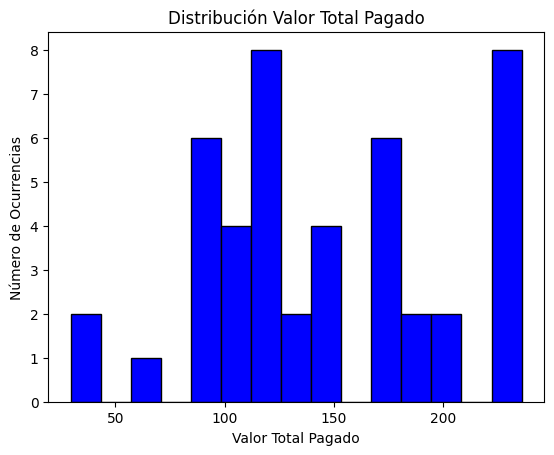

In [ ]:
data_valpag = df['total_pagado'].copy(deep='True')

plt.title("Distribución Valor Total Pagado")
plt.xlabel("Valor Total Pagado")
plt.ylabel("Número de Ocurrencias")

plt.hist(data_valpag, bins=15, color='b', edgecolor='black')
plt.show()






En este caso vemos que la distribución es **bimodal** (dos modas) en los valores 118 y 236 como podemos observar en la siguiente línea

In [ ]:
#Utilizo la función ppredeterminada de pandas para la moda
df['total_pagado'].mode()


0    118.0
1    236.0
Name: total_pagado, dtype: float64

# *Comentarios medidas de centralización*

La mediana y la media estan muy cercanas, lo cual es influienciado por ser una distribución `bimodal`.  No son medidas muy descriptivas en estos casos, dado que la distribución tiende a tener dos jorobas y no hay un valor central notorio.  Sin embargo en el ejemplo la mayoria de los datos estan mas cerca de la moda de menor valor (118) y la segunda moda(236) es el maximo valor que toma la variable total pagado en el dataset

Las distribuciones de este estilo tienden a presentarse cuando hay unos fenómenos subyacentes que afectan la distribución.  En este caso dado que estamos analizando un dataset de valor facturas, es probable que esto obedezca a que hay unas facturas de bajo valor y otras de valor mas alto, ,lo cual puede ser originado por los clientes que se relacionan con estas facturas ( se evaluará mas adelante)




2.   Las medidas de dispersión: rango, varianza, desviación típica y coeficiente de variación. Analiza los resultados obtenidos.


*   **RANGO**





In [ ]:
tot_pagadoran = df['total_pagado'].max()-df['total_pagado'].min()
print("El rango de total pagado es: " +str(tot_pagadoran) )

El rango de total pagado es: 206.5




  *   **VARIANZA ( $ \sigma^2\ $)**



In [ ]:
tot_pagadovar = df['total_pagado'].var()

#Redondeo el numero de decimales de la media
tot_pagadovar=round(tot_pagadovar, 3)
print("La varianza de total pagado es: " +str(tot_pagadovar) )

La varianza de total pagado es: 3356.594




  *   **DESVIACIÓN ESTÁNDAR ( $ \sigma\ $)**



In [ ]:
tot_pagadodesv = df['total_pagado'].std()

#Redondeo el numero de decimales de la media
tot_pagadodesv=round(tot_pagadodesv, 3)
print("La Desviación estándar de total pagado es: " +str(tot_pagadodesv) )

La Desviación estándar de total pagado es: 57.936



 *   **COEFICIENTE DE VARIACIÓN (CV)**



In [ ]:
tot_pagadocv = round(tot_pagadodesv/tot_pagadomd, 3)
print("El cofeciente de variación de total pagado es: " +str(tot_pagadocv) )

El cofeciente de variación de total pagado es: 0.393


# *Comentarios medidas de dispersión*

Dado que consideremos una distribución **bimodal** referente a la variable `total_pagado`, tambien se observa una varianza bastante alta frente a la media dado que hay una gran cantidad de datos antes y despues.  Esto nos indica unos dato bastante dispersos y ademas un rango amplio para esta variable.  

El coeficiente de variación indicaria que es una distribución homogenea lo cual no tiene mucho sentido(menor 80%).  Aqui es importante tener otra distribución que se pueda comparar en este caso y entender las diferencias dado que la desviación estándar es elevada dada la varianza.

3.   Las medidas de posición: rango intercuartílico, cuartil primero y percentil 90.  


*   **RANGO INTERCUARTÍLICO**


In [ ]:
tot_pagadoiqr = df['total_pagado'].quantile(0.75) - df['total_pagado'].quantile(0.25)
print("El rango intercuartílico de total pagado es: " +str(tot_pagadoiqr) )

El rango intercuartílico de total pagado es: 81.0


*   **PRIMER CUARTIL**

In [ ]:
tot_pagadopqr = df['total_pagado'].quantile(0.25)
print("El primer cuartil de total pagado es: " +str(tot_pagadopqr) )

El primer cuartil de total pagado es: 108.0


*   **PERCENTIL 90**

In [ ]:
tot_pagadonov = df['total_pagado'].quantile(0.90)
print("El percentil noventa (90%) de total pagado es: " +str(tot_pagadonov) )

El percentil noventa (90%) de total pagado es: 236.0


# *Comentarios medidas de posición*

Dado que consideremos una distribución **bimodal** referente a la variable `total_pagado`, y los valores que ella toma vemos que el rango intercuartílico es bastante amplio en el sentido que el primer cuartil se encuentra cerca de la primera moda ( 108 vs 110 -moda) y tercer cuartil un poco mas lejano de la segunda moda

El percentil 90% de la distribución coincide con la segunda moda ya que es el ultimo valor que presenta la distribucion.

4.   Las medidas de concentración y forma: curtosis, asimetría y el gráfico asociado.  


*   **CURTOSIS**

La asimetría del total pagado es: 0.096442
La curtosis del total pagado es: -0.799096


<ipython-input-17-ac4cd0e5cef5>:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['total_pagado'])


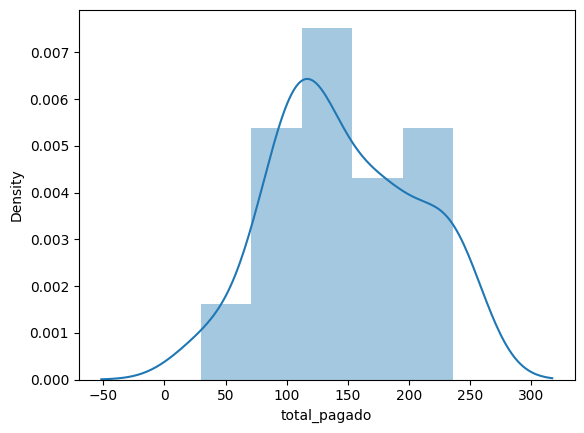

In [ ]:
import scipy.stats as ss
import seaborn as sns

#Se calcula la asimetría
print("La asimetría del total pagado es: %f" % df['total_pagado'].skew() )

#Se calcula la curtosis
print("La curtosis del total pagado es: %f" % df['total_pagado'].kurt() )

#Gráfico de la distribución
sns.distplot(df['total_pagado'])
plt.show()

# *Comentarios medidas de concentración*

Se observa una **asimetría** positiva lo cual tendería a apuntar a una distribución con cola a la derecha.  Sin embaro tenemos que al ser `bimodal` , este tema no es tan concluyente

Por otro lado la **curtosis** es negativa y esto significa que la distribución no es concentrada alrededor de la media ( que no es muy clara en una distribucion `bimodal` ) y por lo tanto la distribución es ***platicúrtica***

5.   Realiza un análisis de todos los datos obtenidos en los apartados anteriores y añade un gráfico de box-plot explicando los resultados también.

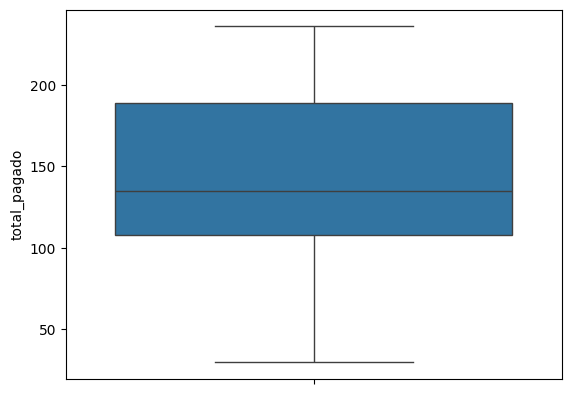

In [ ]:
#Gráfico BOX-PLOT

sns.boxplot(df['total_pagado'])
plt.show()


# *Comentarios Estadística unidimensional -BOXPLOT*

Observamos en general una distribución con un IQR no muy amplio y sin **outliers**.  Vemos que la media esta por debajo de la mediana esta cerca pero por debajo de la media y esto quiere decir que la distribución esta un poco cargada en datos hacia valores altos lo cual se comprueba con la asimetrīa de la función.  

La moda que se ubica en la parte maxima de los bigotes hace que la distribución se cargue un poco para estos valores altos y acerca un poco el vlor medio hacia esos valores

# PARTE 2 - Análisis de la información de la empresa y su situación



  1.  ANALIZA los resultados e informa de quién es el cliente que ha pagado MÁS en todas las facturas.

  Inicialmente vamos a tomar el valor `total_pagado` que incluye el IVA y ver en términos de valores cual es el que mas ha pagado dentro del dataframe

  Se observa que el ***clienteA*** es quien mas ha pagado en total (incluyendo IVA) desde una perspectiva de cliente pero por muy poco frente a ***clienteB*** y casi el doble de valor frente al cliente que menos factura que es ***clienteC***

In [ ]:
cliente_maspag = df.groupby('cliente')['total_pagado'].\
                  sum().sort_values(ascending=False)
cliente_maspag=pd.DataFrame(cliente_maspag)
cliente_maspag


,total_pagado
cliente,
clienteA,2099.0
clienteD,2038.4
clienteB,1337.0
clienteC,1154.5


Sin embargo dado que `total_pagado` es una variable que incluye el IVA, vamos a validar los tipos de IVA que se pueden tomar en el dataset para ver la influencia del impuesto en el valor pagado, dado que al final el IVA no generaría para la empresa un beneficio, y la idea es entender quienes son los que mas compran

In [ ]:
df['porcentaje_IVA'].unique()

array([18,  8])

Dado que observamos dos valores en porcentaje de IVA que son bien diferentes, vamos a ver que pasa si lo miramos en valor pagado sin considerar el IVA

Concluimos que no cambia el cliente si no se considera el IVA dentro del valor de la factura

In [ ]:
cliente_maspag2 = df.groupby('cliente')['importe_factura'].\
                  sum().sort_values(ascending=False)
cliente_maspag2=pd.DataFrame(cliente_maspag2)
cliente_maspag2

,importe_factura
cliente,
clienteA,1800
clienteD,1730
clienteB,1150
clienteC,1025


In [ ]:
cliente_maspag2.reset_index()
cliente_maspag2['cliente']=['clienteA', 'clienteD', 'clienteB', 'clienteC']

In [ ]:
import plotly.express as px

fig = px.pie(cliente_maspag2, values='importe_factura', names='cliente',
             title='Total Factura por cliente (sin IVA)')
fig.update_traces(textposition='inside', textinfo='percent+label')
fig.update_layout(showlegend=False)
fig.show()

  2.  ANALIZA los resultados e informa de quién es el cliente que ha pagado MENOS facturas en el mes de febrero.

  Para este caso vamos a tratar de ver cuantos pedidos han solicitado (conteo) para el mes de febrero.  Se determina que el **cliente B** y el **cliente C** son los que menos han pagado facturas en el mes de febrero

In [ ]:
#Se crea un nuevo dataframe de facturas para el mes de Febrero
fact_feb =pd.DataFrame(df[df['mes'] == 'Febrero'])

#Se determina cual es cliente con menos números (conteo) de facturas de febrero
menfact_feb =pd.DataFrame(fact_feb.groupby('cliente')['id'].nunique().\
                          sort_values(ascending=True))
menfact_feb

,id
cliente,
clienteB,3
clienteC,3
clienteA,4
clienteD,4


Ahora vamos a verlo desde el punto de vista de valor pagado quien genera menos valor pagado en el mes de Febrero

Aqui vemos que entre el **clienteB** y el **clienteC**, definitivamente el **clienteB** es el que menos paga en el mes de Febrero

In [ ]:
#Se determina cual es cliente con menos valor total pagado en febrero
menval_feb =pd.DataFrame(fact_feb.groupby('cliente')['total_pagado'].\
                          sum().sort_values(ascending=True))
menval_feb

,total_pagado
cliente,
clienteB,295.0
clienteC,314.5
clienteD,563.4
clienteA,666.0


3.  Análisis predictivo

  

  1.  Crea un gráfico que represente el total pagado de las facturas respecto del IVA aplicado.



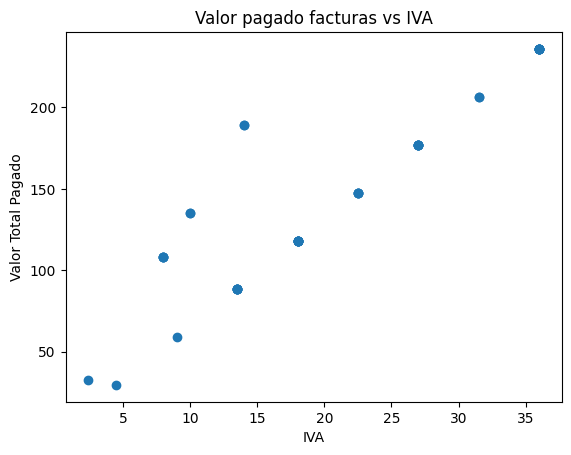

In [ ]:

#Se hace cambio del tipo de dato de variable IVA  a float
df['IVA'] = df['IVA'].str.replace(',', '.').astype(float)


plt.title("Valor pagado facturas vs IVA")
plt.xlabel("IVA")
plt.ylabel("Valor Total Pagado")

plt.scatter(df["IVA"],df["total_pagado"])
plt.show()

In [ ]:
matcov=df.cov()
cova =matcov.loc["IVA", "total_pagado"]
print("La covarianza de IVA y Valor total pagado es: " +str(cova) )

La covarianza de IVA y Valor total pagado es: 526.768808080808


<ipython-input-44-49d85d90e4a7>:1: FutureWarning:

The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
dfclienteA=df[df['cliente']=='clienteA'].copy(deep='True')
plt.plot(df['mes''], )